# Perceptron and Adapline

This notebook is the implementation of perceptron and adaline.  
Using dataset from the Iris dataset, with simple EDA and implement binary classification.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

# Import Dataset

In [4]:

# URL of the Iris dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Load the dataset with no header and UTF-8 encoding
df = pd.read_csv(url, header=None, encoding='utf-8')

# Optional: assign column names for clarity
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

# Display the last 5 rows
print(df.tail())


     sepal length  sepal width  petal length  petal width           class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


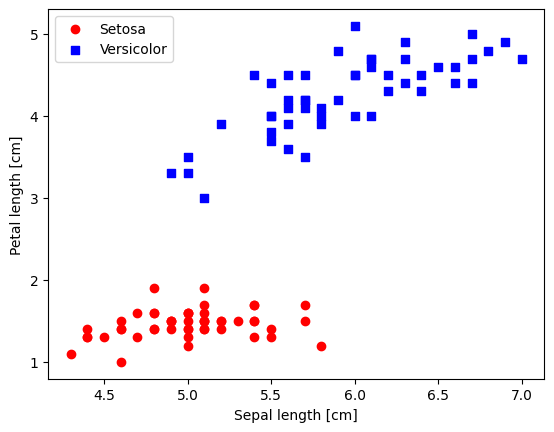

In [5]:

# Select only Setosa and Versicolor (first 100 samples)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# Extract features: sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# Plotting
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


# Implementing Perceptron

## Define Perceptron

In [6]:
import numpy as np

class Perceptron:
    """Perceptron classifier.

    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    b_ : float
        Bias unit after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data."""
        # It is common to init. the weight and bias inside _fit
        rng = np.random.RandomState(self.random_state)
        self.w_ = rng.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = 0.
        self.errors_ = []

        for epoch in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                errors += self._update_weights(xi, target)
            self.errors_.append(errors)
        return self

    def _update_weights(self, xi, target):
        """Apply the perceptron learning rule to update weights."""
        prediction = self.predict(xi)
        error = target - prediction
        update = self.eta * error
        # Update weights and bias if there is an error
        if update != 0.0:
            self.w_ += update * xi
            self.b_ += update
            return 1  # one error occurred
        return 0  # no error

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


## Train

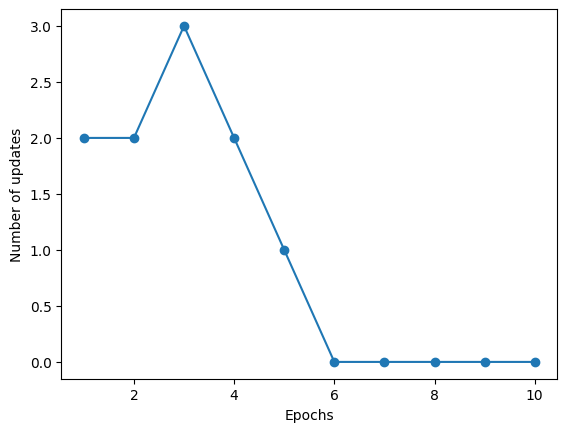

In [7]:
# Start Training
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1),
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [8]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Predict class labels for all points in the meshgrid
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    # Plot the decision boundary
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

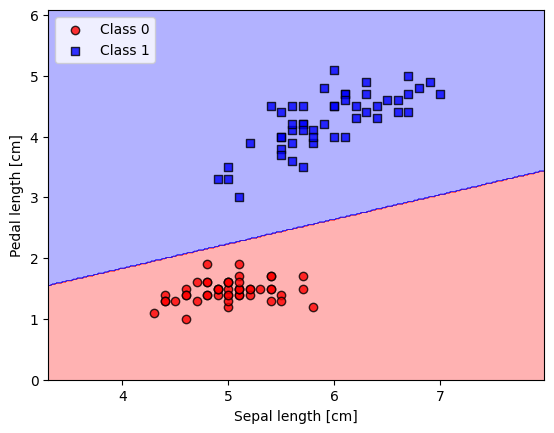

In [9]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Pedal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Implement the Adaliner

## Gradient Descent version

In [10]:
import numpy as np

class AdalineGD:

    def __init__(self, eta=0.01, n_iter=50, random_state=42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
      """Fit training data using conventional batch gradient descent."""
      rng = np.random.RandomState(self.random_state)
      n_features = X.shape[1]

      # Initialize weights and bias
      self.w_ = rng.normal(loc=0.0, scale=0.01, size=n_features)
      self.b_ = 0.0

      self.losses_ = []

      for _ in range(self.n_iter):
          z = self.net_input(X)
          y_pred = self.activation(z)
          errors = y - y_pred

          # Since we cal the loss in MSE (cal. all at once)
          # We update the bias and weights all at once
          # Using gradient descent
          self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
          self.b_ += self.eta * 2.0 * errors.mean()

          # Calculate mean squared error loss
          loss = np.mean(errors**2)
          self.losses_.append(loss)

      return self


    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
      return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.5, 1, 0)


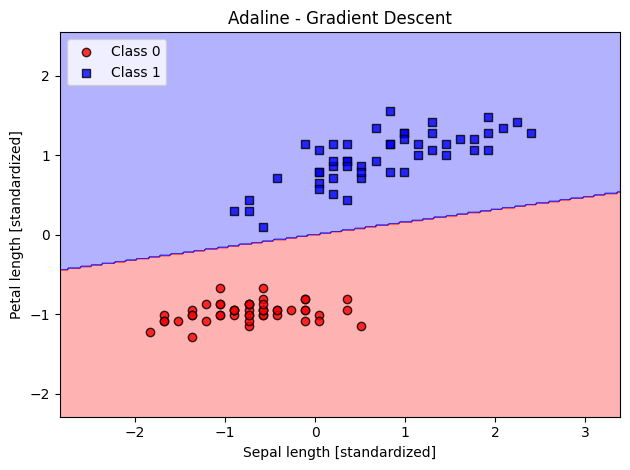

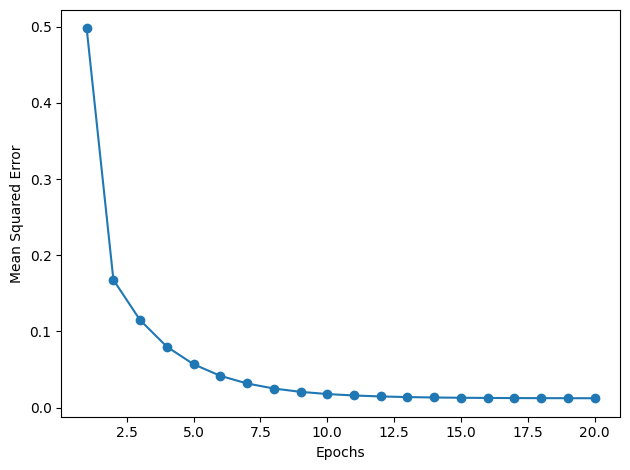

In [11]:
X_std = np.copy(X)
# standardization to help gradient descent
# since the data are all in the same scale, it is easier to the learning rate that works well for all weights and bias
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

# ▶️ Train Adaline using gradient descent with learning rate η = 0.5
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)  # X_std: standardized input features

# 📈 Plot the decision boundary after training
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 📉 Plot the loss (mean squared error) over epochs
plt.plot(range(1, len(ada_gd.losses_) + 1),
         ada_gd.losses_,
         marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()


### Comparison between different learning rate

We can see that if we choose a learning rate that is too large, the MSE becomes larger because we overshoot the global minimum loss.  
On the other hand, if the learning rate is too small, it requires a very karge number of epoch to get to converge to the global minimum loss.

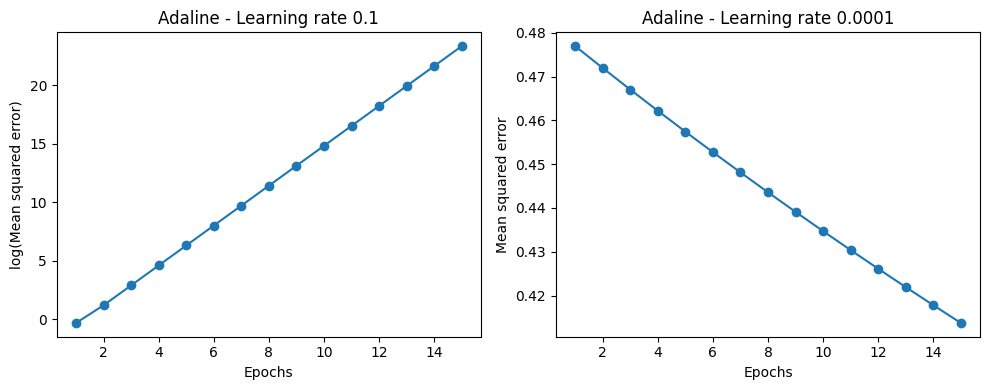

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Adaline with learning rate 0.1
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1),
           np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

# Adaline with learning rate 0.0001
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1),
           ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
plt.show()

## Stochatic Gradient Descent version (mini-batch gradient descent)

Instead of updating the wieghts based on the sum of the accumulated errors all over the training sample, we update it **incrementally for each training example**  

By updating the bias and weight ever interation, I can converge to the minimum loss faster.

In [21]:

class AdalineSGD:

    def __init__(self, eta=0.01, n_iter=50, random_state=42, shuffle=True):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.w_initialized = False # implemment partial fit, which doesn't reinitialiez weight
        self.shuffle = shuffle

    def fit(self, X, y):
      self._initialize_weights(X.shape[1])
      self.losses_ = []

      for _ in range(self.n_iter):
        if self.shuffle:
          X,y = self._shuffle(X,y)
        losses = []
        for xi, target in zip(X,y):
          losses.append(self._update_weights(xi, target))
        avg_loss = np.mean(losses)
        self.losses_.append(avg_loss)
      return self

    def partial_fit(self, X, y):
      if not self.w_initialized:
        self._initialize_weights(X.shape[1])
      # ensuring that y is and 1-D array, if higher dimension, ravel() turns it into 1-d array
      if y.ravel().shape[0] > 1:
        for xi, target in zip(X,y):
          self._update_weights(xi, target)
      else:
        self._update_weights(X,y)
      return self

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
      self.rgen = np.random.RandomState(self.random_state)
      self.w_ = self.rgen.normal(loc=0.0, scale=0.1, size=m)
      self.b_ = np.float64(0.)
      self.w_initialized = True

    def _update_weights(self, xi, target):
      output = self.activation(self.net_input(xi))
      error = target - output
      self.w_ += self.eta * 2.0 * xi * error
      self.b_ += self.eta * 2.0 * error
      loss = error**2
      return loss

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
      return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.5, 1, 0)


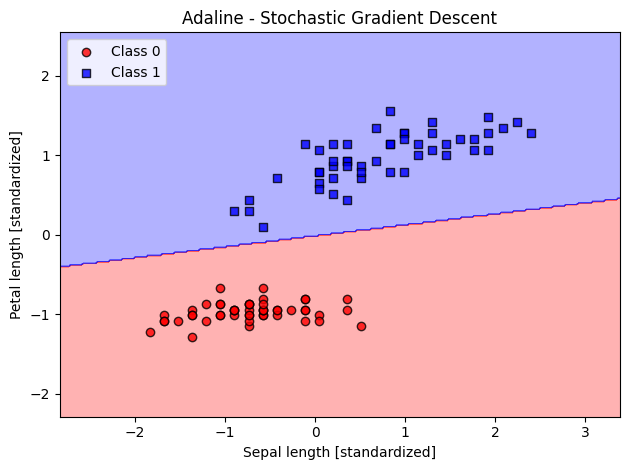

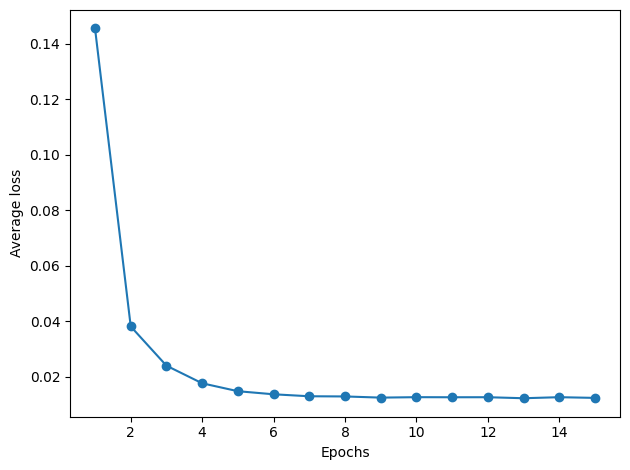

In [23]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plot the average loss curve over epochs
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()


# Using Scikit Learn to Train Perceptrons

In [25]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# stratify = keep the subset with same proportions of class labels
print(f'Labels counts in y : {np.bincount(y)}')
print(f'Labels counts in y train : {np.bincount(y_train)}')
print(f'Labels counts in y test : {np.bincount(y_test)}')

Labels counts in y : [50 50 50]
Labels counts in y train : [35 35 35]
Labels counts in y test : [15 15 15]


In [33]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=42)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print(f'Misclassified examples: { (y_test != y_pred).sum()}')
print(f'Acc: {ppn.score(X_test_std, y_test)}')

Misclassified examples: 7
Acc: 0.8444444444444444


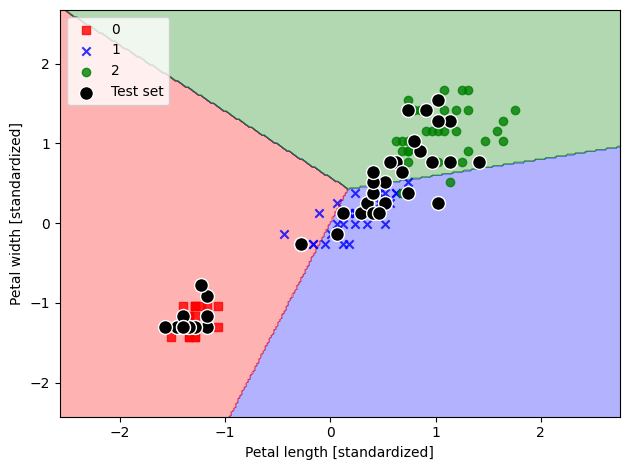

In [35]:

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Set up marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'purple', 'orange')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=colors[idx],
                    marker=markers[idx], label=cl)

    # Highlight test samples
    if test_idx:
        X_test = X[test_idx]
        y_test = y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='black', edgecolor='white',
                    alpha=1.0, marker='o', s=100, label='Test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
